<a href="https://colab.research.google.com/github/josephfriedel/AAI-510-TEAM-03/blob/main/JFriedel_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



*Assignment 2.1: Cure Garbage In, Garbage Out
#Split your data into train, validation & test sets, #then train a model predicting the target variable in the dataset with minimal or no feature engineering. #Identify key performance metrics for this problem, and note performance statistics. #The decision tree model can be any decision tree variant (GBT, XGBoost, etc.) #The purpose of this step in the process is to establish baseline performance



So I used three feature engineering techniques: (1) Min-Max Scaling (Normalization), (2) Standardization, (3) L1 Regulariatzion (Lasso).  I did not
get an improvement over baseline (no feature engineering).  On investigation, I was not executing the feature engineering cases correctly.  Also,
running into memory issues, where the sw would time out.  I went on Slack for support, and got the code in the next section.  It worked some of the time.
I created a shorter DF with some success.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from traitlets.config import get_config
c = get_config()
c.NotebookApp.iopub_data_rate_limit = 10000000

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew
from sklearn.linear_model import LogisticRegression

def load_dataset(filename):
    df = pd.read_csv(filename)
    return df
df = load_dataset("train_data.csv")

In [4]:
#df = sns.load_dataset('train_dataset.csv')
#df = load_dataset("train_data.csv")
shap = df.shape
print("Shape of the dataframe (row, col):",shap,"\r\n")

Shape of the dataframe (row, col): (10816, 122) 



In [5]:
# Show the dataframe
df

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0          410704       0         Cash loans           F            N   
1          381230       0         Cash loans           F            N   
2          450177       0         Cash loans           F            Y   
3          332445       0         Cash loans           M            Y   
4          357429       0         Cash loans           F            Y   
...           ...     ...                ...         ...          ...   
10811      318630       0         Cash loans           F            N   
10812      240598       0         Cash loans           F            N   
10813      223212       0         Cash loans           F            Y   
10814      377406       0         Cash loans           M            Y   
10815      190125       0         Cash loans           F            N   

      FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                   Y             1          157500.0    900000.0   
1                   Y             1           90000.0    733176.0   
2                   Y             0          189000.0   1795500.0   
3                   N             0          175500.0    494550.0   
4                   Y             0          270000.0   1724688.0   
...               ...           ...               ...         ...   
10811               Y             1          180000.0    254700.0   
10812               Y             3          126000.0    607500.0   
10813               Y             0          225000.0   1350000.0   
10814               Y             0           90000.0    225000.0   
10815               Y             1          292500.0   1125000.0   

       AMT_ANNUITY  ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20  \
0          26446.5  ...               0.0              0.0              0.0   
1          21438.0  ...               0.0              0.0              0.0   
2          62541.0  ...               0.0              0.0              0.0   
3          45490.5  ...               0.0              0.0              0.0   
4          54283.5  ...               0.0              0.0              0.0   
...            ...  ...               ...              ...              ...   
10811      16582.5  ...               0.0              0.0              0.0   
10812      19728.0  ...               0.0              0.0              0.0   
10813      39604.5  ...               0.0              0.0              0.0   
10814      12915.0  ...               0.0              0.0              0.0   
10815      47794.5  ...               NaN              NaN              NaN   

      FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                  0.0                        0.0                       0.0   
1                  0.0                        0.0                       0.0   
2                  0.0                        0.0                       0.0   
3                  0.0                        0.0                       0.0   
4                  0.0                        0.0                       0.0   
...                ...                        ...                       ...   
10811              0.0                        0.0                       0.0   
10812              0.0                        0.0                       0.0   
10813              0.0                        0.0                       0.0   
10814              0.0                        NaN                       NaN   
10815              NaN                        NaN                       NaN   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                             0.0                        0.0   
1                             0.0                        0.0   
2                             0.0                        0.0   
3                             0.0                        0.0   
4                             0.0                        0.0   
...                

In [6]:
#Clean Data
# Missing values
missing_count = df.isnull().sum()
missing_count

SK_ID_CURR                       0
TARGET                           0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     1443
AMT_REQ_CREDIT_BUREAU_WEEK    1443
AMT_REQ_CREDIT_BUREAU_MON     1443
AMT_REQ_CREDIT_BUREAU_QRT     1443
AMT_REQ_CREDIT_BUREAU_YEAR    1443
Length: 122, dtype: int64

In [7]:
# Total of missing values
total_cells = np.product(df.shape)
total_missing = df.isnull().sum().sum()

# Percentage of missing data
(total_missing/total_cells) * 100

24.25414079930158

In [8]:
# Remove all columns with at least one missing value
new_df = df.dropna(axis=1)
new_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      410704       0         Cash loans           F            N   
1      381230       0         Cash loans           F            N   
2      450177       0         Cash loans           F            Y   
3      332445       0         Cash loans           M            Y   
4      357429       0         Cash loans           F            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0               Y             1          157500.0    900000.0   
1               Y             1           90000.0    733176.0   
2               Y             0          189000.0   1795500.0   
3               N             0          175500.0    494550.0   
4               Y             0          270000.0   1724688.0   

  NAME_INCOME_TYPE  ... REGION_RATING_CLIENT_W_CITY  \
0          Working  ...                           2   
1          Working  ...                           2   
2        Pensioner  ...                           2   
3        Pensioner  ...                           2   
4          Working  ...                           2   

  WEEKDAY_APPR_PROCESS_START HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       8   
1                     FRIDAY                      11   
2                    TUESDAY                       9   
3                     MONDAY                      15   
4                   THURSDAY                      12   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       1   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  
0                       0                        0  Business Entity Type 3  
1                       1                        1                    Bank  
2                       0                        0                     XNA  
3                       0                        0                     XNA  
4                       0                        0           Self-employed  

[5 rows x 36 columns]

In [9]:
# Data loss
print("Number of columns in the original dataset: %d \n" % df.shape[1])
print("Number of columns with NaN values removed: %d" % new_df.shape[1])

Number of columns in the original dataset: 122 

Number of columns with NaN values removed: 36


In [10]:
# Replace missing values with 0
newer_df = new_df.fillna(0)
newer_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      410704       0         Cash loans           F            N   
1      381230       0         Cash loans           F            N   
2      450177       0         Cash loans           F            Y   
3      332445       0         Cash loans           M            Y   
4      357429       0         Cash loans           F            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0               Y             1          157500.0    900000.0   
1               Y             1           90000.0    733176.0   
2               Y             0          189000.0   1795500.0   
3               N             0          175500.0    494550.0   
4               Y             0          270000.0   1724688.0   

  NAME_INCOME_TYPE  ... REGION_RATING_CLIENT_W_CITY  \
0          Working  ...                           2   
1          Working  ...                           2   
2        Pensioner  ...                           2   
3        Pensioner  ...                           2   
4          Working  ...                           2   

  WEEKDAY_APPR_PROCESS_START HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       8   
1                     FRIDAY                      11   
2                    TUESDAY                       9   
3                     MONDAY                      15   
4                   THURSDAY                      12   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       1   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  
0                       0                        0  Business Entity Type 3  
1                       1                        1                    Bank  
2                       0                        0                     XNA  
3                       0                        0                     XNA  
4                       0                        0           Self-employed  

[5 rows x 36 columns]

In [11]:
# Total of missing values
total_cells = np.product(newer_df.shape)
total_missing = newer_df.isnull().sum().sum()

# Percentage of missing data
(total_missing/total_cells) * 100

0.0

In [12]:
#split data set into the following parts:
#          60% - train set,
#          20% - validation set,
#          20% - test set
train, validate, test = \
              np.split(newer_df.sample(frac=1, random_state=42),
                       [int(.6*len(newer_df)), int(.8*len(newer_df))])

In [13]:
train

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
1432       100695       0         Cash loans           F            N   
8844       353811       0         Cash loans           F            N   
4874       403781       0    Revolving loans           F            Y   
927        315435       0         Cash loans           F            Y   
1731       400557       0         Cash loans           F            Y   
...           ...     ...                ...         ...          ...   
10023      251960       0         Cash loans           F            N   
2977       293705       0         Cash loans           F            N   
6743       201137       0         Cash loans           F            Y   
9254       406201       0         Cash loans           F            N   
8789       191877       0         Cash loans           F            N   

      FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
1432                Y             0          135000.0   1219500.0   
8844                Y             0          135000.0    175500.0   
4874                Y             0          202500.0    585000.0   
927                 N             0          225000.0    426312.0   
1731                N             0          157500.0    675000.0   
...               ...           ...               ...         ...   
10023               Y             0          135000.0    254700.0   
2977                Y             0          157500.0    536917.5   
6743                N             0          225000.0    679500.0   
9254                N             0          180000.0    247275.0   
8789                Y             2           45000.0     47970.0   

           NAME_INCOME_TYPE  ... REGION_RATING_CLIENT_W_CITY  \
1432              Pensioner  ...                           2   
8844                Working  ...                           2   
4874                Working  ...                           1   
927    Commercial associate  ...                           2   
1731   Commercial associate  ...                           2   
...                     ...  ...                         ...   
10023             Pensioner  ...                           2   
2977   Commercial associate  ...                           2   
6743                Working  ...                           2   
9254   Commercial associate  ...                           2   
8789                Working  ...                           3   

      WEEKDAY_APPR_PROCESS_START HOUR_APPR_PROCESS_START  \
1432                      MONDAY                      10   
8844                    THURSDAY                      14   
4874                   WEDNESDAY                      13   
927                     THURSDAY                      18   
1731                   WEDNESDAY                      19   
...                          ...                     ...   
10023                  WEDNESDAY                      12   
2977                      FRIDAY                       9   
6743                      FRIDAY                      19   
9254                      SUNDAY                       8   
8789                      FRIDAY                       9   

       REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
1432                            0                           0   
8844                            0                           0   
4874                            0                           0   
927                             0                           0   
1731                            0                           0   
...                           ...                         ...   
10023                           0                           0   
2977                            0                           0   
6743                            0                           0   
9254                            0                           0   
8789                            0                           0   

       LIVE_REGION_NOT_WORK_RE

In [14]:
validate

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
5473       422207       0         Cash loans           M            N   
945        170202       0         Cash loans           F            Y   
7559       395368       0         Cash loans           F            N   
8598       246021       0         Cash loans           M            N   
5097       138823       0         Cash loans           F            N   
...           ...     ...                ...         ...          ...   
521        401259       0         Cash loans           F            N   
3983       398315       0    Revolving loans           F            Y   
10347      450947       0         Cash loans           M            N   
780        205400       0         Cash loans           M            N   
9191       385750       0         Cash loans           F            N   

      FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
5473                N             0          112500.0    450000.0   
945                 Y             2          225000.0    225756.0   
7559                Y             0          225000.0   1988667.0   
8598                N             1          135000.0     85320.0   
5097                Y             2           67500.0     52128.0   
...               ...           ...               ...         ...   
521                 Y             0           90000.0    170640.0   
3983                Y             0          450000.0    900000.0   
10347               Y             0           67500.0    167895.0   
780                 Y             1          112500.0    269550.0   
9191                Y             0           34200.0    284400.0   

           NAME_INCOME_TYPE  ... REGION_RATING_CLIENT_W_CITY  \
5473                Working  ...                           2   
945                 Working  ...                           2   
7559   Commercial associate  ...                           1   
8598   Commercial associate  ...                           2   
5097                Working  ...                           2   
...                     ...  ...                         ...   
521               Pensioner  ...                           2   
3983   Commercial associate  ...                           2   
10347             Pensioner  ...                           2   
780                 Working  ...                           2   
9191              Pensioner  ...                           2   

      WEEKDAY_APPR_PROCESS_START HOUR_APPR_PROCESS_START  \
5473                      FRIDAY                      10   
945                     SATURDAY                      10   
7559                   WEDNESDAY                      12   
8598                    SATURDAY                       8   
5097                      MONDAY                      14   
...                          ...                     ...   
521                       FRIDAY                      12   
3983                    THURSDAY                      13   
10347                   THURSDAY                      15   
780                     SATURDAY                      10   
9191                     TUESDAY                      13   

       REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
5473                            0                           1   
945                             0                           0   
7559                            0                           0   
8598                            0                           1   
5097                            0                           0   
...                           ...                         ...   
521                             0                           0   
3983                            0                           0   
10347                           0                           0   
780                             0                           0   
9191                            0                           0   

       LIVE_REGION_NOT_WORK_RE

In [15]:
test

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
5607      257288       0         Cash loans           M            N   
5978      313449       0         Cash loans           F            Y   
3747      153565       0         Cash loans           M            Y   
2196      124092       0         Cash loans           F            N   
8561      168757       0    Revolving loans           F            N   
...          ...     ...                ...         ...          ...   
5734      341263       0         Cash loans           F            N   
5191      166006       0         Cash loans           F            Y   
5390      345487       0    Revolving loans           M            N   
860       179596       0         Cash loans           M            N   
7270      394435       0         Cash loans           M            N   

     FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
5607               Y             0          216000.0   1350000.0   
5978               Y             0          225000.0   1467612.0   
3747               Y             0          157500.0    288873.0   
2196               N             1           99000.0    675000.0   
8561               Y             0          112500.0    270000.0   
...              ...           ...               ...         ...   
5734               Y             0          121500.0    167121.0   
5191               Y             1          270000.0   1198944.0   
5390               Y             1          180000.0    180000.0   
860                N             0          157500.0    224136.0   
7270               Y             0          135000.0    225000.0   

          NAME_INCOME_TYPE  ... REGION_RATING_CLIENT_W_CITY  \
5607               Working  ...                           2   
5978  Commercial associate  ...                           1   
3747  Commercial associate  ...                           2   
2196         State servant  ...                           2   
8561               Working  ...                           2   
...                    ...  ...                         ...   
5734               Working  ...                           2   
5191  Commercial associate  ...                           1   
5390               Working  ...                           2   
860                Working  ...                           2   
7270               Working  ...                           2   

     WEEKDAY_APPR_PROCESS_START HOUR_APPR_PROCESS_START  \
5607                     MONDAY                      12   
5978                    TUESDAY                       9   
3747                     MONDAY                      11   
2196                   THURSDAY                      11   
8561                    TUESDAY                      10   
...                         ...                     ...   
5734                   THURSDAY                      15   
5191                     FRIDAY                      14   
5390                     SUNDAY                      15   
860                     TUESDAY                      10   
7270                     FRIDAY                       9   

      REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
5607                           0                           0   
5978                           0                           1   
3747                           0                           0   
2196                           0                           0   
8561                           0                           0   
...                          ...                         ...   
5734                           0                           0   
5191                           0                           0   
5390                           0                           0   
860                            0                           0   
7270                           0                           0   

      LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
5607                        

In [16]:
#display the first 5 rows in dataset:
newer_df.head(5)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      410704       0         Cash loans           F            N   
1      381230       0         Cash loans           F            N   
2      450177       0         Cash loans           F            Y   
3      332445       0         Cash loans           M            Y   
4      357429       0         Cash loans           F            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0               Y             1          157500.0    900000.0   
1               Y             1           90000.0    733176.0   
2               Y             0          189000.0   1795500.0   
3               N             0          175500.0    494550.0   
4               Y             0          270000.0   1724688.0   

  NAME_INCOME_TYPE  ... REGION_RATING_CLIENT_W_CITY  \
0          Working  ...                           2   
1          Working  ...                           2   
2        Pensioner  ...                           2   
3        Pensioner  ...                           2   
4          Working  ...                           2   

  WEEKDAY_APPR_PROCESS_START HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       8   
1                     FRIDAY                      11   
2                    TUESDAY                       9   
3                     MONDAY                      15   
4                   THURSDAY                      12   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       1   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  
0                       0                        0  Business Entity Type 3  
1                       1                        1                    Bank  
2                       0                        0                     XNA  
3                       0                        0                     XNA  
4                       0                        0           Self-employed  

[5 rows x 36 columns]

In [17]:
#shows the data type of each column, number of columns, memory usage, and the number of records in the dataset:
newer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10816 entries, 0 to 10815
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SK_ID_CURR                   10816 non-null  int64  
 1   TARGET                       10816 non-null  int64  
 2   NAME_CONTRACT_TYPE           10816 non-null  object 
 3   CODE_GENDER                  10816 non-null  object 
 4   FLAG_OWN_CAR                 10816 non-null  object 
 5   FLAG_OWN_REALTY              10816 non-null  object 
 6   CNT_CHILDREN                 10816 non-null  int64  
 7   AMT_INCOME_TOTAL             10816 non-null  float64
 8   AMT_CREDIT                   10816 non-null  float64
 9   NAME_INCOME_TYPE             10816 non-null  object 
 10  NAME_EDUCATION_TYPE          10816 non-null  object 
 11  NAME_FAMILY_STATUS           10816 non-null  object 
 12  NAME_HOUSING_TYPE            10816 non-null  object 
 13  REGION_POPULATIO

In [18]:
#display the number of records and columns:
newer_df.shape

(10816, 36)

In [19]:
#summarize the dataset’s statistical properties, such as count, mean, min, and max:
df.describe()

SK_ID_CURR   TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT  \
count   10816.000000  10816.0  10816.000000      1.081600e+04  1.081600e+04   
mean   278576.459042      0.0      0.415958      1.690281e+05  6.082020e+05   
std    102786.138396      0.0      0.720071      1.071779e+05  4.127315e+05   
min    100010.000000      0.0      0.000000      2.700000e+04  4.500000e+04   
25%    189712.750000      0.0      0.000000      1.125000e+05  2.700000e+05   
50%    278948.500000      0.0      0.000000      1.485000e+05  5.212800e+05   
75%    367170.250000      0.0      1.000000      2.025000e+05  8.248230e+05   
max    456197.000000      0.0     12.000000      3.950060e+06  4.050000e+06   

         AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
count   10815.000000     1.080100e+04                10816.000000   
mean    27207.187656     5.478830e+05                    0.020946   
std     14393.590493     3.790466e+05                    0.014029   
min      2781.000000     4.500000e+04                    0.000533   
25%     16456.500000     2.385000e+05                    0.010006   
50%     25033.500000     4.545000e+05                    0.018850   
75%     34782.750000     6.975000e+05                    0.028663   
max    173704.500000     4.050000e+06                    0.072508   

         DAYS_BIRTH  DAYS_EMPLOYED  ...  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  \
count  10816.000000   10816.000000  ...      10815.000000      10815.000000   
mean  -16117.172522   64451.907637  ...          0.007027          0.000555   
std     4374.748405  141881.777590  ...          0.083538          0.023548   
min   -25175.000000  -16767.000000  ...          0.000000          0.000000   
25%   -19778.250000   -2850.000000  ...          0.000000          0.000000   
50%   -15852.500000   -1220.500000  ...          0.000000          0.000000   
75%   -12554.000000    -296.000000  ...          0.000000          0.000000   
max    -7688.000000  365243.000000  ...          1.000000          1.000000   

       FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  \
count      10815.000000      10815.000000                 9373.000000   
mean           0.000277          0.000555                    0.007042   
std            0.016654          0.023548                    0.086136   
min            0.000000          0.000000                    0.000000   
25%            0.000000          0.000000                    0.000000   
50%            0.000000          0.000000                    0.000000   
75%            0.000000          0.000000                    0.000000   
max            1.000000          1.000000                    2.000000   

       AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
count                9373.000000                 9373.000000   
mean                    0.005868                    0.030940   
std                     0.101565                    0.197354   
min                     0.000000                    0.000000   
25%                     0.000000                    0.000000   
50%                     0.000000                    0.000000   
75%                     0.000000                    0.000000   
max                     6.000000                    6.000000   

       AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
count                9373.000000                9373.000000   
mean                    0.273338                   0.264163   
std                     0.939012                   0.612671   
min                     0.000000                   0.000000   
25%                     0.000000                   0.000000   
50%                     0.000000                   0.000000   
75%                     0.000000                   0.000000   
max                    17.000000                   8.000000   

       AMT_REQ_CREDIT_BUREAU_YEAR  
count                 9373.000000  
mean                     1.899499  
std                      1.838419  
min              

In [24]:
df["HOUSETYPE_MODE"] = df['HOUSETYPE_MODE'].replace({'block of flats': 1, 'terraced house': 2, 'specific housing': 3}).fillna(-1).astype(int)
df["FONDKAPREMONT_MODE"] = df['FONDKAPREMONT_MODE'].replace({'reg oper account': 1, 'org spec account': 2, 'reg oper spec account': 3, 'not specified': 4}).fillna(-1).astype(int)
df["NAME_HOUSING_TYPE"] = df['NAME_HOUSING_TYPE'].replace({'House / apartment': 1, 'Municipal apartment': 2, 'Office apartment': 3, 'Rented apartment': 4, 'With parents': 5, 'Co-op apartment': 6}).fillna(-1).astype(int)

In [26]:
# Remove all rows with NaN values
df = df.dropna()
print("\nDataFrame with NaN rows removed:")
#print(df)


DataFrame with NaN rows removed:


In [27]:
# Convert enuerations to integer
#del df['OCCUPATION_TYPE']
#del df['ORGANIZATION_TYPE']
df["HOUSETYPE_MODE"] = df['HOUSETYPE_MODE'].replace({'block of flats': 1, 'terraced house': 2, 'specific housing': 3}).astype(int)
df["FONDKAPREMONT_MODE"] = df['FONDKAPREMONT_MODE'].replace({'reg oper account': 1, 'org spec account': 2, 'reg oper spec account': 3, 'not specified': 4}).astype(int)
df["NAME_HOUSING_TYPE"] = df['NAME_HOUSING_TYPE'].replace({'House / apartment': 1, 'Municipal apartment': 2, 'Office apartment': 3, 'Rented apartment': 4, 'With parents': 5, 'Co-op apartment':6}).astype(int)
#df["NAME_EDUCATION_TYPE"] = df['NAME_EDUCATION_TYPE'].replace({'Secondary / secondary special': 1, 'Higher education': 2, 'Lower secondary': 3, 'Incomplete higher': 4, 'Academic degree': 5}).astype(int)
df["NAME_INCOME_TYPE"] = df['NAME_INCOME_TYPE'].replace({'Working': 1, 'Pensioner': 2, 'Commercial associate': 3, 'State servant': 4, 'Unemployed': 5, 'Businessman': 6, 'Student': 7, 'Maternity leave': 7}).astype(int)
df["NAME_TYPE_SUITE"] = df['NAME_TYPE_SUITE'].replace({'Unaccompanied': 1, 'Family': 2, 'Children': 3, 'Spouse, partner': 4, 'Other_A': 5, 'Other_B': 6, 'Group of people': 7}).astype(int)
df["NAME_FAMILY_STATUS"] = df['NAME_FAMILY_STATUS'].replace({'Married': 1, 'Single / not married': 2, 'Civil marriage': 3, 'Widow': 4, 'Separated': 5, 'Unknown': 6, 'Others': 7}).astype(int)
df["WALLSMATERIAL_MODE"] = df['WALLSMATERIAL_MODE'].replace({'Panel': 1, 'Wooden': 2, 'Stone, brick': 3, 'Block': 4, 'Mixed': 5, 'Monolithic': 6, 'Others': 7, 'Unknown': 8}).astype(int)
df["EMERGENCYSTATE_MODE"] = df['EMERGENCYSTATE_MODE'].replace({'No': 1, 'Yes': 2}).astype(int)
df["FLAG_OWN_CAR"] = df['FLAG_OWN_CAR'].replace({'N': 0, 'Y': 1}).astype(int)
df["FLAG_OWN_REALTY"] = df['FLAG_OWN_REALTY'].replace({'N': 0, 'Y': 1}).astype(int)
df["CODE_GENDER"] = df['CODE_GENDER'].replace({'M': 0, 'F': 1}).astype(int)
df["NAME_CONTRACT_TYPE"] = df['NAME_CONTRACT_TYPE'].replace({'Cash loans': 0, 'Revolving loans': 1}).astype(int)
df["WEEKDAY_APPR_PROCESS_START"] = df['WEEKDAY_APPR_PROCESS_START'].replace({'MONDAY': 1, 'TUESDAY': 2, 'WEDNESDAY': 3, 'THURSDAY': 4, 'FRIDAY': 5, 'SATURDAY': 6, 'SUNDAY': 7}).astype(int)
#display the first 5 rows in dataset:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
df.head(5)

<ipython-input-27-2ca46556f1ef>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["HOUSETYPE_MODE"] = df['HOUSETYPE_MODE'].replace({'block of flats': 1, 'terraced house': 2, 'specific housing': 3}).astype(int)
<ipython-input-27-2ca46556f1ef>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["FONDKAPREMONT_MODE"] = df['FONDKAPREMONT_MODE'].replace({'reg oper account': 1, 'org spec account': 2, 'reg oper spec account': 3, 'not specified': 4}).astype(int)
<ipython-input-27-2ca46556f1ef>:6: SettingWithCopyW

SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
10      426135       0                   1            0             1   
23      351866       0                   0            1             1   
29      158698       0                   0            0             1   
45      365041       0                   0            1             1   
47      292880       0                   0            0             1   

    FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
10                1             0          202500.0    270000.0      13500.0   
23                1             0           90000.0     50940.0       5877.0   
29                0             2          135000.0    730017.0      27054.0   
45                1             1          202500.0   1288350.0      37800.0   
47                1             2          135000.0    225000.0      26833.5   

    AMT_GOODS_PRICE  NAME_TYPE_SUITE  NAME_INCOME_TYPE  \
10         270000.0                1                 3   
23          45000.0                1                 3   
29         652500.0                2                 3   
45        1125000.0                1                 1   
47         225000.0                1                 1   

              NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
10  Secondary / secondary special                   2                  1   
23               Higher education                   3                  1   
29               Higher education                   1                  1   
45  Secondary / secondary special                   4                  1   
47  Secondary / secondary special                   5                  1   

    REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
10                    0.010500      -15082          -1624            -2233.0   
23                    0.022625      -11961          -3707            -5896.0   
29                    0.019689      -12721          -1487            -6771.0   
45                    0.031329      -18895          -5271             -193.0   
47                    0.026392      -12529           -554            -1027.0   

    DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
10            -4411         10.0           1               1                0   
23            -4574          8.0           1               1                0   
29            -4979          3.0           1               1                1   
45            -2458          5.0           1               1                1   
47            -4577          7.0           1               1                0   

    FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  \
10                 1           0           0                1   
23                 1           1           0                2   
29                 1           1           0                4   
45                 1           1           0                2   
47                 1           1           1                3   

    REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
10                     3                            3   
23                     2                            2   
29                     2                            2   
45                     2                            2   
47                     2                            2   

    WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
10                           2                       12   
23                           5                       10   
29                           2                       16   
45                           6                        8   
47                           3                       17   

    REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
10                           0                           0   
23                           0                           0   
29                           0     

In [30]:
df["NAME_EDUCATION_TYPE"] = df['NAME_EDUCATION_TYPE'].replace({'Secondary / secondary special': 1, 'Higher education': 2, 'Lower secondary': 3, 'Incomplete higher': 4, 'Academic degree': 5}).astype(int)

<ipython-input-30-ed6c71fc113b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["NAME_EDUCATION_TYPE"] = df['NAME_EDUCATION_TYPE'].replace({'Secondary / secondary special': 1, 'Higher education': 2, 'Lower secondary': 3, 'Incomplete higher': 4, 'Academic degree': 5}).astype(int)


In [86]:
cont=['NAME_CONTRACT_TYPE','CODE_GENDER'	,'FLAG_OWN_CAR',	'FLAG_OWN_REALTY',	'AMT_GOODS_PRICE',	'NAME_TYPE_SUITE','NAME_INCOME_TYPE',	'NAME_EDUCATION_TYPE',	'NAME_FAMILY_STATUS',	'NAME_HOUSING_TYPE',	'REGION_POPULATION_RELATIVE',	'DAYS_BIRTH',	'DAYS_EMPLOYED',	'DAYS_REGISTRATION',	'DAYS_ID_PUBLISH',	'OWN_CAR_AGE',	'FLAG_MOBIL',	'FLAG_EMP_PHONE',	'FLAG_WORK_PHONE',	'FLAG_CONT_MOBILE',	'FLAG_PHONE',	'FLAG_EMAIL',	'CNT_FAM_MEMBERS',	'REGION_RATING_CLIENT',	'REGION_RATING_CLIENT_W_CITY',	'WEEKDAY_APPR_PROCESS_START',	'HOUR_APPR_PROCESS_START'	,'REG_REGION_NOT_LIVE_REGION',	'REG_REGION_NOT_WORK_REGION',	'LIVE_REGION_NOT_WORK_REGION'	,'REG_CITY_NOT_LIVE_CITY',	'REG_CITY_NOT_WORK_CITY',	'LIVE_CITY_NOT_WORK_CITY',	'EXT_SOURCE_1',	'EXT_SOURCE_2',	'EXT_SOURCE_3',	'APARTMENTS_AVG',	'BASEMENTAREA_AVG',	'YEARS_BEGINEXPLUATATION_AVG',	'YEARS_BUILD_AVG',	'COMMONAREA_AVG',	'ELEVATORS_AVG',	'ENTRANCES_AVG',	'FLOORSMAX_AVG',	'FLOORSMIN_AVG',	'LANDAREA_AVG',	'LIVINGAPARTMENTS_AVG',	'LIVINGAREA_AVG',	'NONLIVINGAPARTMENTS_AVG',	'NONLIVINGAREA_AVG',	'APARTMENTS_MODE',	'BASEMENTAREA_MODE',	'YEARS_BEGINEXPLUATATION_MODE	YEARS_BUILD_MODE',	'COMMONAREA_MODE',	'ELEVATORS_MODE',	'ENTRANCES_MODE',	'FLOORSMAX_MODE',	'FLOORSMIN_MODE',	'LANDAREA_MODE',	'LIVINGAPARTMENTS_MODE',	'LIVINGAREA_MODE',	'NONLIVINGAPARTMENTS_MODE',	'NONLIVINGAREA_MODE',	'APARTMENTS_MEDI',	'BASEMENTAREA_MEDI'	,'YEARS_BEGINEXPLUATATION_MEDI',	'YEARS_BUILD_MEDI',	'COMMONAREA_MEDI',	'ELEVATORS_MEDI',	'ENTRANCES_MEDI',	'FLOORSMAX_MEDI',	'FLOORSMIN_MEDI',	'LANDAREA_MEDI',	'LIVINGAPARTMENTS_MEDI',	'LIVINGAREA_MEDI',	'NONLIVINGAPARTMENTS_MEDI',	'NONLIVINGAREA_MEDI',	'FONDKAPREMONT_MODE',	'HOUSETYPE_MODE',	'TOTALAREA_MODE',	'WALLSMATERIAL_MODE',	'EMERGENCYSTATE_MODE',	'OBS_30_CNT_SOCIAL_CIRCLE',	'DEF_30_CNT_SOCIAL_CIRCLE',	'OBS_60_CNT_SOCIAL_CIRCLE',	'DEF_60_CNT_SOCIAL_CIRCLE',	'DAYS_LAST_PHONE_CHANGE',	'FLAG_DOCUMENT_2',	'FLAG_DOCUMENT_3',	'FLAG_DOCUMENT_4',	'FLAG_DOCUMENT_5',	'FLAG_DOCUMENT_6',	'FLAG_DOCUMENT_7',	'FLAG_DOCUMENT_8',	'FLAG_DOCUMENT_9',	'FLAG_DOCUMENT_10',	'FLAG_DOCUMENT_11',	'FLAG_DOCUMENT_12',	'FLAG_DOCUMENT_13',	'FLAG_DOCUMENT_14',	'FLAG_DOCUMENT_15',	'FLAG_DOCUMENT_16',	'FLAG_DOCUMENT_17',	'FLAG_DOCUMENT_18',	'FLAG_DOCUMENT_19',	'FLAG_DOCUMENT_20'	,'FLAG_DOCUMENT_21'	,'AMT_REQ_CREDIT_BUREAU_HOUR'	,'AMT_REQ_CREDIT_BUREAU_DAY',	'AMT_REQ_CREDIT_BUREAU_WEEK'	,'AMT_REQ_CREDIT_BUREAU_MON',	'AMT_REQ_CREDIT_BUREAU_QRT',	'AMT_REQ_CREDIT_BUREAU_YEAR']
target = ['TARGET']
categorical = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'CNT_CHILDREN']

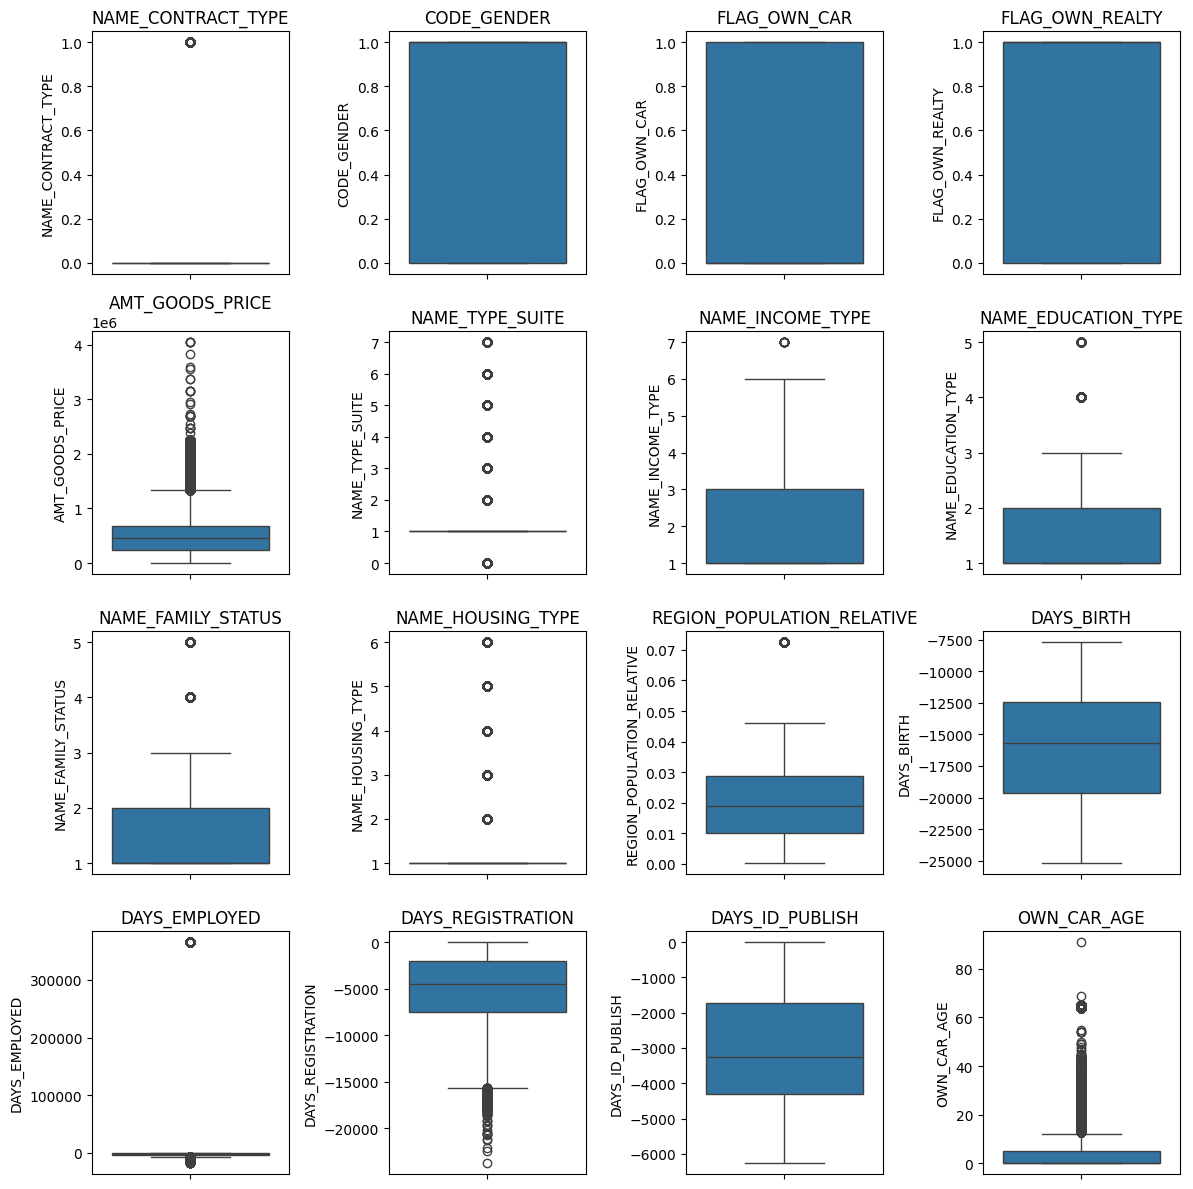

In [84]:
fig, ax = plt.subplots(4, 4, figsize=(12, 12))

for ax, col in zip(ax.flatten(), cont):
    sns.boxplot(y=df[col], ax=ax)
    ax.set_title(col)

fig.tight_layout()
fig.show()

In [85]:
fig, ax = plt.subplots(2, 2, figsize=(12, 12))

for ax, col in zip(ax.flatten(), categorical):
    sns.countplot(x=df[col], ax=ax)
    ax.set_title(col)
    ax.tick_params(axis='x', labelrotation = 90)

fig.tight_layout()
fig.show()

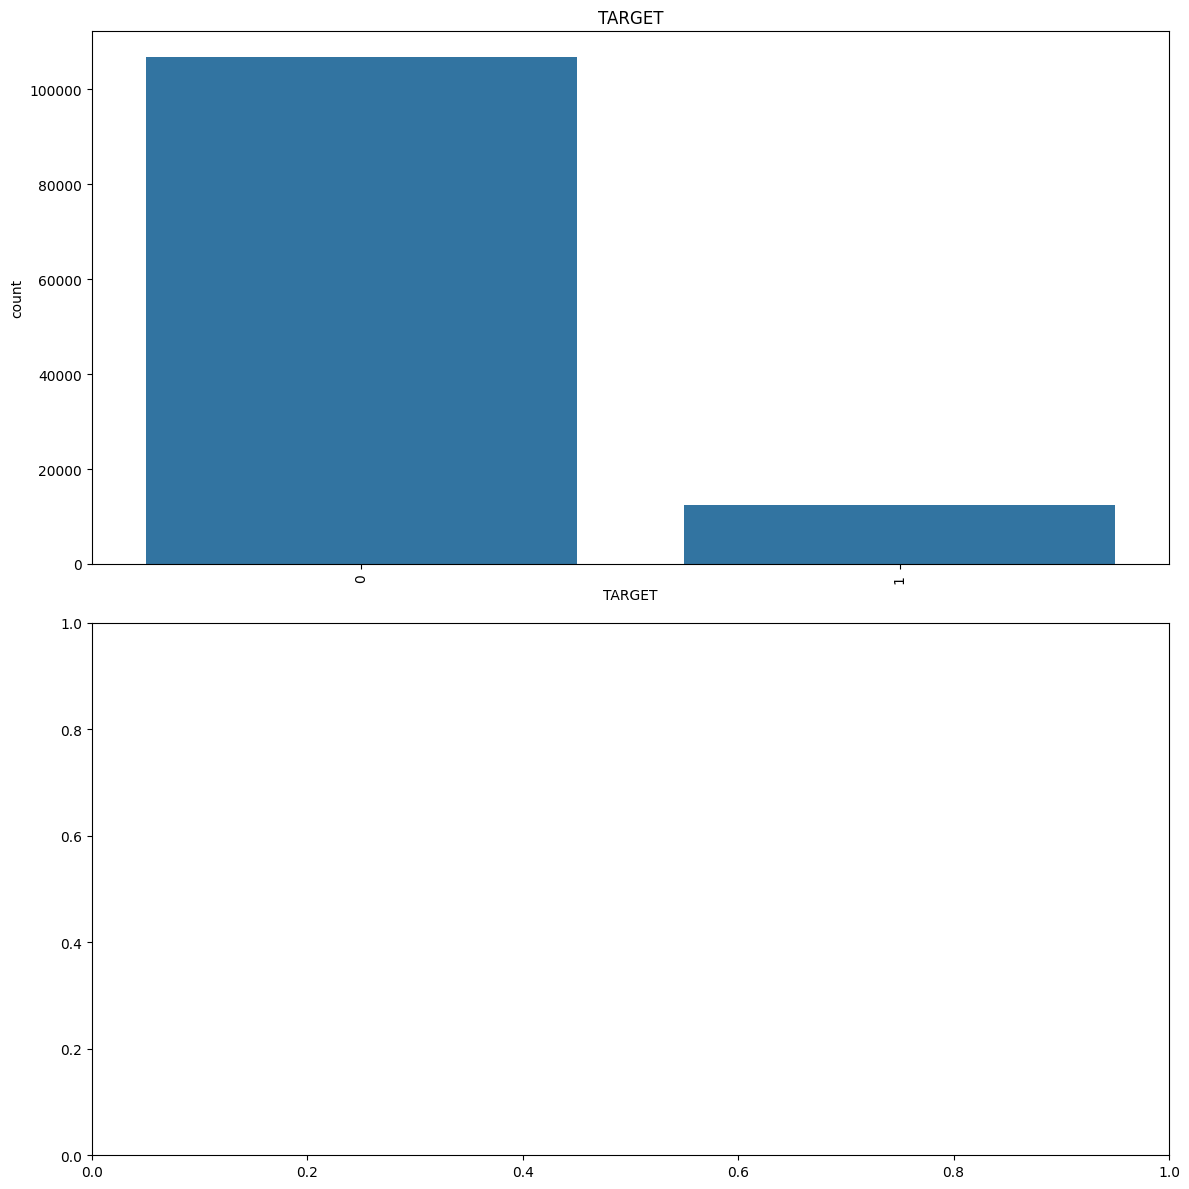

In [89]:
fig, ax = plt.subplots(2, figsize=(12, 12))

for ax, col in zip(ax.flatten(), target):
    sns.countplot(x=df[col], ax=ax)
    ax.set_title(col)
    ax.tick_params(axis='x', labelrotation = 90)

fig.tight_layout()
fig.show()

In [94]:
params = categorical+target

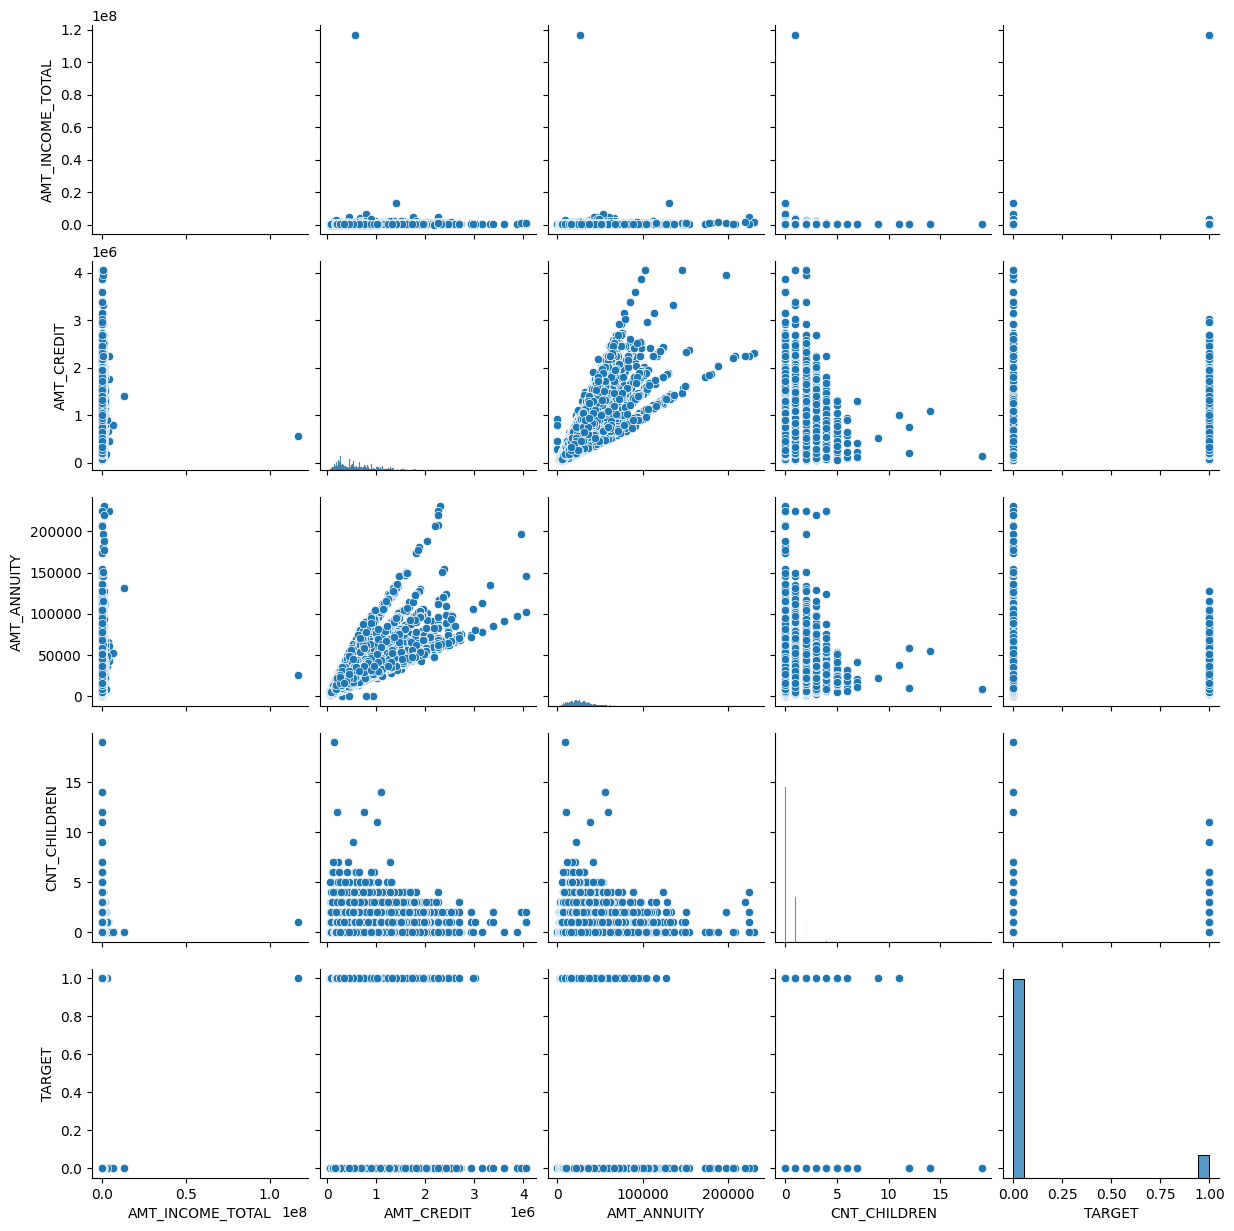

In [95]:
sns.pairplot(df[params])

In [28]:
# Get unique values in 'NAME_EDUCATION_TYPE'
unique_values_column1 = df['NAME_EDUCATION_TYPE'].unique()
print("Unique values in 'NAME_EDUCATION_TYPE':", unique_values_column1)

Unique values in 'NAME_EDUCATION_TYPE': ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary']


In [31]:
#display the correlation between different variables in dataset:
df.corr()

SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  \
SK_ID_CURR                      1.000000     NaN           -0.043385   
TARGET                               NaN     NaN                 NaN   
NAME_CONTRACT_TYPE             -0.043385     NaN            1.000000   
CODE_GENDER                     0.093738     NaN            0.015754   
FLAG_OWN_CAR                         NaN     NaN                 NaN   
FLAG_OWN_REALTY                 0.109749     NaN            0.077083   
CNT_CHILDREN                   -0.020716     NaN           -0.038249   
AMT_INCOME_TOTAL                0.053847     NaN           -0.034175   
AMT_CREDIT                      0.006883     NaN           -0.270552   
AMT_ANNUITY                     0.036376     NaN           -0.307974   
AMT_GOODS_PRICE                 0.005550     NaN           -0.239161   
NAME_TYPE_SUITE                -0.040401     NaN           -0.079251   
NAME_INCOME_TYPE                0.027900     NaN           -0.001252   
NAME_EDUCATION_TYPE             0.010142     NaN           -0.003125   
NAME_FAMILY_STATUS             -0.037960     NaN           -0.011024   
NAME_HOUSING_TYPE              -0.092837     NaN            0.040383   
REGION_POPULATION_RELATIVE     -0.022766     NaN           -0.017780   
DAYS_BIRTH                     -0.048883     NaN           -0.003649   
DAYS_EMPLOYED                   0.010277     NaN           -0.021843   
DAYS_REGISTRATION              -0.055295     NaN           -0.077244   
DAYS_ID_PUBLISH                 0.045500     NaN            0.063996   
OWN_CAR_AGE                    -0.015794     NaN            0.104333   
FLAG_MOBIL                           NaN     NaN                 NaN   
FLAG_EMP_PHONE                 -0.012151     NaN            0.023866   
FLAG_WORK_PHONE                 0.053447     NaN           -0.100767   
FLAG_CONT_MOBILE                     NaN     NaN                 NaN   
FLAG_PHONE                      0.033587     NaN           -0.072512   
FLAG_EMAIL                      0.051304     NaN           -0.071677   
CNT_FAM_MEMBERS                 0.003784     NaN           -0.080949   
REGION_RATING_CLIENT            0.023532     NaN            0.043510   
REGION_RATING_CLIENT_W_CITY     0.015932     NaN            0.068193   
WEEKDAY_APPR_PROCESS_START      0.125521     NaN            0.025570   
HOUR_APPR_PROCESS_START        -0.034503     NaN            0.029391   
REG_REGION_NOT_LIVE_REGION     -0.048004     NaN           -0.043257   
REG_REGION_NOT_WORK_REGION     -0.089320     NaN           -0.034554   
LIVE_REGION_NOT_WORK_REGION    -0.072601     NaN           -0.023866   
REG_CITY_NOT_LIVE_CITY         -0.005794     NaN           -0.028561   
REG_CITY_NOT_WORK_CITY         -0.049418     NaN            0.022062   
LIVE_CITY_NOT_WORK_CITY        -0.073521     NaN            0.056879   
EXT_SOURCE_1                    0.047812     NaN            0.005805   
EXT_SOURCE_2                   -0.052059     NaN           -0.015140   
EXT_SOURCE_3                    0.004289     NaN            0.044961   
APARTMENTS_AVG                  0.002986     NaN           -0.104601   
BASEMENTAREA_AVG                0.047753     NaN           -0.097969   
YEARS_BEGINEXPLUATATION_AVG    -0.048118     NaN            0.029744   
YEARS_BUILD_AVG                 0.074936     NaN            0.028477   
COMMONAREA_AVG                 -0.032401     NaN           -0.026882   
ELEVATORS_AVG                   0.003561     NaN           -0.104333   
ENTRANCES_AVG                  -0.042041     NaN           -0.071490   
FLOORSMAX_AVG                   0.040935     NaN           -0.064197   
FLOORSMIN_AVG                   0.021385     NaN           -0.028177   
LANDAREA_AVG                    0.096322     NaN           -0.067516   
LIVINGAPARTMENTS_AVG           -0.015451     NaN           -0.098314   
LIVINGAREA_AVG                 -0.001070     NaN           -0.098279   
NONLIVINGAPARTMENTS_AVG         0.030355     NaN            0.022442  

In [32]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [33]:
X = df.iloc[:,1:106]
y= df.iloc[:,-1]   #target output (TARGET)

In [34]:
import pandas as pd
feature_names = list(df.columns)
target_names = list(df.TARGET)

print('Feature names: ', feature_names)
print('\nTarget names: ', target_names, '(-)')
print("\nFirst 5 rows of X:\n", X[:5])
print('\nShape of dataset', X.shape)

Feature names:  ['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(281, 105)
(121, 105)
(281,)
(121,)


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1) # split the data

In [37]:
# importing the linearRegression class
from sklearn.linear_model import LinearRegression
regressor = LinearRegression() # instantiate the Linear Regression model
regressor.fit(X_train, y_train) # training the model

LinearRegression()

In [38]:
# expose the model to new values and predict the target vector
y_predictions = regressor.predict(X_test)
print('Predictions:', y_predictions)
# get the coefficients and intercept
print("Coefficients:\n", regressor.coef_)
print('Intercept:\n', regressor.intercept_)

Predictions: [-3.56776272e+00  3.47747306e-01  4.02984758e-02  4.48232487e+00
  1.33493917e+00  6.01418404e+00  5.01623097e+00  5.26866406e+00
  2.17409568e-01  3.22144674e+00  1.70825027e+02  3.01449724e+00
  3.05996866e+00  3.90865638e+00  5.94900154e-01 -3.75469687e+00
  3.85029217e+00  3.91408722e+00 -7.45176408e+00  6.91633943e-01
  4.51580089e+00  1.55349771e+00 -2.25181823e+00  2.46645262e+00
  4.58693002e+00  2.52040270e+00  4.13386829e-03  2.93592587e+00
  2.50899411e-01  2.65555827e+00  7.14648849e-01  2.56016444e+00
  3.70482686e+00  2.94708780e+00  4.88611908e-01 -4.35778629e-01
  2.39771099e-01  9.20812806e-01  6.62808213e-01  3.67313135e+00
  6.80622867e-01  2.73187730e+00  2.39596418e+00  2.42963124e+00
  5.76939332e+00  3.30029393e+00  6.04301467e+00  2.80140574e+00
  6.73586952e-01  1.60089607e+00  1.54531218e+00  5.56707287e+00
  9.55159462e-01 -2.39740160e+00  6.49711908e+00  2.11679240e+01
  4.76064282e+00  3.83644465e+00 -7.79788648e+00  3.05022475e+00
  1.91264689

#Then: Apply three or more feature engineering techniques on the credit-default data and:

#Use the same algorithm, and note the change in model performance.
#Note that the target variable has a large imbalance.
# consider the use of sampling as a means to be able to adequately model the data
#When evaluating model performance, strongly consider using metrics outside of accuracy to better reflect model performance.,
#Justify your choice of feature engineering techniques that you used.
#Sampling will count as a feature engineering technique for this exercise
#If performance has not improved - explain why.

In [39]:
#df = sns.load_dataset('train_dataset.csv')
df = load_dataset("train_data.csv")
shap = df.shape
print("Shape of the dataframe (row, col):",shap,"\r\n")

# Show the dataframe
#df

Shape of the dataframe (row, col): (119297, 122) 



In [40]:
small_df=df[df.SK_ID_CURR<102200]
shap = small_df.shape
print("Shape of the dataframe (row, col):",shap,"\r\n")

Shape of the dataframe (row, col): (748, 122) 



In [41]:
# Feature Scaling
#================
#Min-Max Scaling(Normalization)
from sklearn.preprocessing import MinMaxScaler
print("Original Dataset:")
#print(small_df)

Original Dataset:


In [42]:
# Remove all columns with at least one missing value
new_df = df.dropna(axis=1)
new_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      410704       0         Cash loans           F            N   
1      381230       0         Cash loans           F            N   
2      450177       0         Cash loans           F            Y   
3      332445       0         Cash loans           M            Y   
4      357429       0         Cash loans           F            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0               Y             1          157500.0    900000.0   
1               Y             1           90000.0    733176.0   
2               Y             0          189000.0   1795500.0   
3               N             0          175500.0    494550.0   
4               Y             0          270000.0   1724688.0   

  NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0          Working  Secondary / secondary special               Married   
1          Working               Higher education  Single / not married   
2        Pensioner  Secondary / secondary special               Married   
3        Pensioner               Higher education               Married   
4          Working               Higher education               Married   

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0  House / apartment                    0.010006      -16180          -2037   
1  House / apartment                    0.031329      -14969           -162   
2  House / apartment                    0.028663      -22213         365243   
3  House / apartment                    0.004960      -19301         365243   
4  House / apartment                    0.018850      -18409           -886   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
0            -3722.0            -3495           1               1   
1            -5502.0            -4442           1               1   
2           -12395.0            -4674           1               0   
3             -859.0            -2847           1               0   
4            -3835.0            -1958           1               1   

   FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  \
0                1                 1           1           0                3   
1                1                 1           1           1                2   
2                0                 1           0           0                2   
3                0                 1           0           0                2   
4                0                 1           0           0                2   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     2                            2   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                        8   
1                     FRIDAY                       11   
2                    TUESDAY                        9   
3                     MONDAY                       15   
4                   THURSDAY                       12   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       1   
4                            0  

In [43]:
# Replace missing values with 0
df = df.fillna(0)
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      410704       0         Cash loans           F            N   
1      381230       0         Cash loans           F            N   
2      450177       0         Cash loans           F            Y   
3      332445       0         Cash loans           M            Y   
4      357429       0         Cash loans           F            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             1          157500.0    900000.0      26446.5   
1               Y             1           90000.0    733176.0      21438.0   
2               Y             0          189000.0   1795500.0      62541.0   
3               N             0          175500.0    494550.0      45490.5   
4               Y             0          270000.0   1724688.0      54283.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         900000.0   Unaccompanied          Working   
1         612000.0   Unaccompanied          Working   
2        1795500.0   Unaccompanied        Pensioner   
3         450000.0   Unaccompanied        Pensioner   
4        1575000.0          Family          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special               Married  House / apartment   
1               Higher education  Single / not married  House / apartment   
2  Secondary / secondary special               Married  House / apartment   
3               Higher education               Married  House / apartment   
4               Higher education               Married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.010006      -16180          -2037            -3722.0   
1                    0.031329      -14969           -162            -5502.0   
2                    0.028663      -22213         365243           -12395.0   
3                    0.004960      -19301         365243             -859.0   
4                    0.018850      -18409           -886            -3835.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -3495          0.0           1               1                1   
1            -4442          0.0           1               1                1   
2            -4674          7.0           1               0                0   
3            -2847         22.0           1               0                0   
4            -1958          7.0           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0               0                3   
1                 1           1           1     Accountants                2   
2                 1           0           0               0                2   
3                 1           0           0               0                2   
4                 1           0           0      Core staff                2   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     2                            2   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                        8   
1                     FRIDAY                       11   
2                    TUESDAY                        9   
3                     MONDAY                       15   
4                   THURSDAY                       12   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [44]:
df.pop('OCCUPATION_TYPE')

0                             0
1                   Accountants
2                             0
3                             0
4                    Core staff
5                      Laborers
6                             0
7                Medicine staff
8                    Core staff
9                             0
10                     Managers
11                            0
12                     Laborers
13                            0
14                     Laborers
15         Waiters/barmen staff
16                            0
17                     Laborers
18                            0
19                     Managers
20                      Drivers
21                   Core staff
22                  Sales staff
23        High skill tech staff
24                     Laborers
25               Cleaning staff
26                     Laborers
27                            0
28                     Managers
29                     Laborers
30                  Sales staff
31      

In [48]:
# Convert enuerations to integer
#del df['OCCUPATION_TYPE']
del df['ORGANIZATION_TYPE']
df["HOUSETYPE_MODE"] = df['HOUSETYPE_MODE'].replace({'block of flats': 1, 'terraced house': 2, 'specific housing': 3}).astype(int)
df["FONDKAPREMONT_MODE"] = df['FONDKAPREMONT_MODE'].replace({'reg oper account': 1, 'org spec account': 2, 'reg oper spec account': 3, 'not specified': 4}).astype(int)
df["NAME_HOUSING_TYPE"] = df['NAME_HOUSING_TYPE'].replace({'House / apartment': 1, 'Municipal apartment': 2, 'Office apartment': 3, 'Rented apartment': 4, 'With parents': 5, 'Co-op apartment':6}).astype(int)
df["NAME_EDUCATION_TYPE"] = df['NAME_EDUCATION_TYPE'].replace({'Secondary / secondary special': 1, 'Higher education': 2, 'Lower secondary': 3, 'Incomplete higher': 4, 'Academic degree': 5}).astype(int)
df["NAME_INCOME_TYPE"] = df['NAME_INCOME_TYPE'].replace({'Working': 1, 'Pensioner': 2, 'Commercial associate': 3, 'State servant': 4, 'Unemployed': 5, 'Businessman': 6, 'Student': 7, 'Maternity leave': 7}).astype(int)
df["NAME_TYPE_SUITE"] = df['NAME_TYPE_SUITE'].replace({'Unaccompanied': 1, 'Family': 2, 'Children': 3, 'Spouse, partner': 4, 'Other_A': 5, 'Other_B': 6, 'Group of people': 7}).astype(int)
df["NAME_FAMILY_STATUS"] = df['NAME_FAMILY_STATUS'].replace({'Married': 1, 'Single / not married': 2, 'Civil marriage': 3, 'Widow': 4, 'Separated': 5, 'Unknown': 6, 'Others': 7}).astype(int)
df["WALLSMATERIAL_MODE"] = df['WALLSMATERIAL_MODE'].replace({'Panel': 1, 'Wooden': 2, 'Stone, brick': 3, 'Block': 4, 'Mixed': 5, 'Monolithic': 6, 'Others': 7, 'Unknown': 8}).astype(int)
df["EMERGENCYSTATE_MODE"] = df['EMERGENCYSTATE_MODE'].replace({'No': 1, 'Yes': 2}).astype(int)
df["FLAG_OWN_CAR"] = df['FLAG_OWN_CAR'].replace({'N': 0, 'Y': 1}).astype(int)
df["FLAG_OWN_REALTY"] = df['FLAG_OWN_REALTY'].replace({'N': 0, 'Y': 1}).astype(int)
df["CODE_GENDER"] = df['CODE_GENDER'].replace({'M': 0, 'F': 1}).astype(int)
df["NAME_CONTRACT_TYPE"] = df['NAME_CONTRACT_TYPE'].replace({'Cash loans': 0, 'Revolving loans': 1}).astype(int)
df["WEEKDAY_APPR_PROCESS_START"] = df['WEEKDAY_APPR_PROCESS_START'].replace({'MONDAY': 1, 'TUESDAY': 2, 'WEDNESDAY': 3, 'THURSDAY': 4, 'FRIDAY': 5, 'SATURDAY': 6, 'SUNDAY': 7}).astype(int)
#display the first 5 rows in dataset:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
df.head(5)

SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0      410704       0                   0            1             0   
1      381230       0                   0            1             0   
2      450177       0                   0            1             1   
3      332445       0                   0            0             1   
4      357429       0                   0            1             1   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                1             1          157500.0    900000.0      26446.5   
1                1             1           90000.0    733176.0      21438.0   
2                1             0          189000.0   1795500.0      62541.0   
3                0             0          175500.0    494550.0      45490.5   
4                1             0          270000.0   1724688.0      54283.5   

   AMT_GOODS_PRICE  NAME_TYPE_SUITE  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  \
0         900000.0                1                 1                    1   
1         612000.0                1                 1                    2   
2        1795500.0                1                 2                    1   
3         450000.0                1                 2                    2   
4        1575000.0                2                 1                    2   

   NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0                   1                  1                    0.010006   
1                   2                  1                    0.031329   
2                   1                  1                    0.028663   
3                   1                  1                    0.004960   
4                   1                  1                    0.018850   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
0      -16180          -2037            -3722.0            -3495          0.0   
1      -14969           -162            -5502.0            -4442          0.0   
2      -22213         365243           -12395.0            -4674          7.0   
3      -19301         365243             -859.0            -2847         22.0   
4      -18409           -886            -3835.0            -1958          7.0   

   FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
0           1               1                1                 1           1   
1           1               1                1                 1           1   
2           1               0                0                 1           0   
3           1               0                0                 1           0   
4           1               1                0                 1           0   

   FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0           0                3                     2   
1           1                2                     2   
2           0                2                     2   
3           0                2                     2   
4           0                2                     2   

   REGION_RATING_CLIENT_W_CITY  WEEKDAY_APPR_PROCESS_START  \
0                            2                           3   
1                            2                           5   
2                            2                           2   
3                            2                           1   
4                            2                           4   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                        8                           0   
1                       11                           0   
2                        9                           0   
3                       15                           0   
4                       12                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0             

In [51]:
# Replace missing values with 0
small_df = df.fillna(0)
small_df.head()

SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0      410704       0                   0            1             0   
1      381230       0                   0            1             0   
2      450177       0                   0            1             1   
3      332445       0                   0            0             1   
4      357429       0                   0            1             1   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                1             1          157500.0    900000.0      26446.5   
1                1             1           90000.0    733176.0      21438.0   
2                1             0          189000.0   1795500.0      62541.0   
3                0             0          175500.0    494550.0      45490.5   
4                1             0          270000.0   1724688.0      54283.5   

   AMT_GOODS_PRICE  NAME_TYPE_SUITE  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  \
0         900000.0                1                 1                    1   
1         612000.0                1                 1                    2   
2        1795500.0                1                 2                    1   
3         450000.0                1                 2                    2   
4        1575000.0                2                 1                    2   

   NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0                   1                  1                    0.010006   
1                   2                  1                    0.031329   
2                   1                  1                    0.028663   
3                   1                  1                    0.004960   
4                   1                  1                    0.018850   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
0      -16180          -2037            -3722.0            -3495          0.0   
1      -14969           -162            -5502.0            -4442          0.0   
2      -22213         365243           -12395.0            -4674          7.0   
3      -19301         365243             -859.0            -2847         22.0   
4      -18409           -886            -3835.0            -1958          7.0   

   FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
0           1               1                1                 1           1   
1           1               1                1                 1           1   
2           1               0                0                 1           0   
3           1               0                0                 1           0   
4           1               1                0                 1           0   

   FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0           0                3                     2   
1           1                2                     2   
2           0                2                     2   
3           0                2                     2   
4           0                2                     2   

   REGION_RATING_CLIENT_W_CITY  WEEKDAY_APPR_PROCESS_START  \
0                            2                           3   
1                            2                           5   
2                            2                           2   
3                            2                           1   
4                            2                           4   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                        8                           0   
1                       11                           0   
2                        9                           0   
3                       15                           0   
4                       12                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0             

In [53]:
# Convert enuerations to integer
#del small_df['OCCUPATION_TYPE']
#del small_df['ORGANIZATION_TYPE']
small_df["HOUSETYPE_MODE"] = df['HOUSETYPE_MODE'].replace({'block of flats': 1, 'terraced house': 2, 'specific housing': 3}).astype(int)
small_df["FONDKAPREMONT_MODE"] = df['FONDKAPREMONT_MODE'].replace({'reg oper account': 1, 'org spec account': 2, 'reg oper spec account': 3, 'not specified': 4}).astype(int)
small_df["NAME_HOUSING_TYPE"] = df['NAME_HOUSING_TYPE'].replace({'House / apartment': 1, 'Municipal apartment': 2, 'Office apartment': 3, 'Rented apartment': 4, 'With parents': 5, 'Co-op apartment':6}).astype(int)
small_df["NAME_EDUCATION_TYPE"] = df['NAME_EDUCATION_TYPE'].replace({'Secondary / secondary special': 1, 'Higher education': 2, 'Lower secondary': 3, 'Incomplete higher': 4, 'Academic degree': 5}).astype(int)
small_df["NAME_INCOME_TYPE"] = df['NAME_INCOME_TYPE'].replace({'Working': 1, 'Pensioner': 2, 'Commercial associate': 3, 'State servant': 4, 'Unemployed': 5, 'Businessman': 6, 'Student': 7, 'Maternity leave': 7}).astype(int)
small_df["NAME_TYPE_SUITE"] = df['NAME_TYPE_SUITE'].replace({'Unaccompanied': 1, 'Family': 2, 'Children': 3, 'Spouse, partner': 4, 'Other_A': 5, 'Other_B': 6, 'Group of people': 7}).astype(int)
small_df["NAME_FAMILY_STATUS"] = df['NAME_FAMILY_STATUS'].replace({'Married': 1, 'Single / not married': 2, 'Civil marriage': 3, 'Widow': 4, 'Separated': 5, 'Unknown': 6, 'Others': 7}).astype(int)
small_df["WALLSMATERIAL_MODE"] = df['WALLSMATERIAL_MODE'].replace({'Panel': 1, 'Wooden': 2, 'Stone, brick': 3, 'Block': 4, 'Mixed': 5, 'Monolithic': 6, 'Others': 7, 'Unknown': 8}).astype(int)
small_df["EMERGENCYSTATE_MODE"] = df['EMERGENCYSTATE_MODE'].replace({'No': 1, 'Yes': 2}).astype(int)
small_df["FLAG_OWN_CAR"] = df['FLAG_OWN_CAR'].replace({'N': 0, 'Y': 1}).astype(int)
small_df["FLAG_OWN_REALTY"] = df['FLAG_OWN_REALTY'].replace({'N': 0, 'Y': 1}).astype(int)
small_df["CODE_GENDER"] = df['CODE_GENDER'].replace({'M': 0, 'F': 1}).astype(int)
small_df["NAME_CONTRACT_TYPE"] = df['NAME_CONTRACT_TYPE'].replace({'Cash loans': 0, 'Revolving loans': 1}).astype(int)
small_df["WEEKDAY_APPR_PROCESS_START"] = df['WEEKDAY_APPR_PROCESS_START'].replace({'MONDAY': 1, 'TUESDAY': 2, 'WEDNESDAY': 3, 'THURSDAY': 4, 'FRIDAY': 5, 'SATURDAY': 6, 'SUNDAY': 7}).astype(int)
#display the first 5 rows in dataset:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
small_df.head(5)

SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0      410704       0                   0            1             0   
1      381230       0                   0            1             0   
2      450177       0                   0            1             1   
3      332445       0                   0            0             1   
4      357429       0                   0            1             1   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                1             1          157500.0    900000.0      26446.5   
1                1             1           90000.0    733176.0      21438.0   
2                1             0          189000.0   1795500.0      62541.0   
3                0             0          175500.0    494550.0      45490.5   
4                1             0          270000.0   1724688.0      54283.5   

   AMT_GOODS_PRICE  NAME_TYPE_SUITE  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  \
0         900000.0                1                 1                    1   
1         612000.0                1                 1                    2   
2        1795500.0                1                 2                    1   
3         450000.0                1                 2                    2   
4        1575000.0                2                 1                    2   

   NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0                   1                  1                    0.010006   
1                   2                  1                    0.031329   
2                   1                  1                    0.028663   
3                   1                  1                    0.004960   
4                   1                  1                    0.018850   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
0      -16180          -2037            -3722.0            -3495          0.0   
1      -14969           -162            -5502.0            -4442          0.0   
2      -22213         365243           -12395.0            -4674          7.0   
3      -19301         365243             -859.0            -2847         22.0   
4      -18409           -886            -3835.0            -1958          7.0   

   FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
0           1               1                1                 1           1   
1           1               1                1                 1           1   
2           1               0                0                 1           0   
3           1               0                0                 1           0   
4           1               1                0                 1           0   

   FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0           0                3                     2   
1           1                2                     2   
2           0                2                     2   
3           0                2                     2   
4           0                2                     2   

   REGION_RATING_CLIENT_W_CITY  WEEKDAY_APPR_PROCESS_START  \
0                            2                           3   
1                            2                           5   
2                            2                           2   
3                            2                           1   
4                            2                           4   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                        8                           0   
1                       11                           0   
2                        9                           0   
3                       15                           0   
4                       12                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0             

In [54]:
small_df.head(5)

SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0      410704       0                   0            1             0   
1      381230       0                   0            1             0   
2      450177       0                   0            1             1   
3      332445       0                   0            0             1   
4      357429       0                   0            1             1   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                1             1          157500.0    900000.0      26446.5   
1                1             1           90000.0    733176.0      21438.0   
2                1             0          189000.0   1795500.0      62541.0   
3                0             0          175500.0    494550.0      45490.5   
4                1             0          270000.0   1724688.0      54283.5   

   AMT_GOODS_PRICE  NAME_TYPE_SUITE  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  \
0         900000.0                1                 1                    1   
1         612000.0                1                 1                    2   
2        1795500.0                1                 2                    1   
3         450000.0                1                 2                    2   
4        1575000.0                2                 1                    2   

   NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0                   1                  1                    0.010006   
1                   2                  1                    0.031329   
2                   1                  1                    0.028663   
3                   1                  1                    0.004960   
4                   1                  1                    0.018850   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
0      -16180          -2037            -3722.0            -3495          0.0   
1      -14969           -162            -5502.0            -4442          0.0   
2      -22213         365243           -12395.0            -4674          7.0   
3      -19301         365243             -859.0            -2847         22.0   
4      -18409           -886            -3835.0            -1958          7.0   

   FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
0           1               1                1                 1           1   
1           1               1                1                 1           1   
2           1               0                0                 1           0   
3           1               0                0                 1           0   
4           1               1                0                 1           0   

   FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0           0                3                     2   
1           1                2                     2   
2           0                2                     2   
3           0                2                     2   
4           0                2                     2   

   REGION_RATING_CLIENT_W_CITY  WEEKDAY_APPR_PROCESS_START  \
0                            2                           3   
1                            2                           5   
2                            2                           2   
3                            2                           1   
4                            2                           4   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                        8                           0   
1                       11                           0   
2                        9                           0   
3                       15                           0   
4                       12                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0             

In [55]:
# 1. Min-Max Scaling (Normalization)
min_max_scaler=MinMaxScaler()
df_normalized=min_max_scaler.fit_transform(df)
df_normalized=pd.DataFrame(df_normalized, columns=df.columns)

print("\nAfter Min-Max Scaling (Normalization):")
#print(df_normalized)


After Min-Max Scaling (Normalization):


In [ ]:
print(df_normalized)

In [57]:
# Feature Scaling
#================
# Standardization
from sklearn.preprocessing import StandardScaler
print("Original Dataset:")
#print(df)
standard_scaler=StandardScaler();
df_standardized=standard_scaler.fit_transform(df)
df_standardized=pd.DataFrame(df_standardized,columns=df.columns)

print("\nAfter Standardization:")
#print(df_standardized)

Original Dataset:

After Standardization:


In [58]:
# Feature Scaling
#================
# L1 Regularization (Lasso)
import pandas as pd
import numpy as np
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import Lasso

#Generating sample dataset with synthetic features and target
X, y = make_regression(n_samples=100, n_features=10, random_state=42)

# Creating a DataFrame from the generated data
synth_df = pd.DataFrame(X, columns=[f'Feature_{i}' for i in range(1, 11)])
synth_df['Target'] = y

print("Original Dataset:")
print(synth_df.head())

# 1. Univariate Feature Selection
k_best = 5 # Select the top 5 features
selector = SelectKBest(score_func=f_regression, k=k_best)
X_univariate = selector.fit_transform(X, y)
selected_features_univariate = synth_df.columns[:-1][selector.get_support()]

print("\nSelected Features using Univariate Feature Selection:")
print(selected_features_univariate)

#degree=2
#poly_features=PolynomialFeatures(degree=degree, include_bias=False)
#x_poly=poly_features.fit_transform(small_df)
#df_poly=pd.DataFrame[x_poly, columns-[small_df for i in range(1, degree , 1)]]
#standard_scaler=StandardScaler();
#df_standardized=standard_scaler.fit_transform(small_df)
#df_standardized=pd.DataFrame(df_standardized,columns=small_df.columns)

#print("\nAfter Standardization:")
#print(df_standardized)

Original Dataset:
   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0   0.150394   0.950424  -0.759133  -2.123896  -0.576904  -0.599393   
1   1.088951  -0.715304  -0.471932   0.686260   0.679598  -1.867265   
2  -0.714351  -1.191303   0.293072  -0.680025   0.656554   0.346448   
3   0.404051   0.257550  -0.161286  -0.342715  -0.074446  -0.420645   
4   0.606010  -2.081929  -1.556629  -0.704344   1.696456   1.049009   

   Feature_7  Feature_8  Feature_9  Feature_10     Target  
0  -0.525755  -0.839722   0.341756    1.876171 -60.486955  
1  -1.612716   2.314659   0.064280   -1.077745  -0.091994  
2   0.232254   0.250493   1.865775    0.473833 -76.947132  
3  -0.802277  -1.415371   1.886186    0.174578 -38.245170  
4  -1.408461  -0.522723  -1.280429    1.754794  -1.831243  

Selected Features using Univariate Feature Selection:
Index(['Feature_1', 'Feature_2', 'Feature_4', 'Feature_5', 'Feature_7'], dtype='object')


In [59]:
# Feature Scaling
#================
# L1 Regularization (Lasso)
import pandas as pd
import numpy as np
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import Lasso

#Generating sample dataset with synthetic features and target
X, y = make_regression(n_samples=100, n_features=10, random_state=42)

# Creating a DataFrame from the generated data
synth_df = pd.DataFrame(X, columns=[f'Feature_{i}' for i in range(1, 11)])
synth_df['Target'] = y

print("Original Dataset:")
print(synth_df.head())

# 1. Univariate Feature Selection
k_best = 5 # Select the top 5 features
selector = SelectKBest(score_func=f_regression, k=k_best)
X_univariate = selector.fit_transform(X, y)
selected_features_univariate = synth_df.columns[:-1][selector.get_support()]

print("\nSelected Features using Univariate Feature Selection:")
print(selected_features_univariate)

#degree=2
#poly_features=PolynomialFeatures(degree=degree, include_bias=False)
#x_poly=poly_features.fit_transform(small_df)
#df_poly=pd.DataFrame[x_poly, columns-[small_df for i in range(1, degree , 1)]]
#standard_scaler=StandardScaler();
#df_standardized=standard_scaler.fit_transform(small_df)
#df_standardized=pd.DataFrame(df_standardized,columns=small_df.columns)

#print("\nAfter Standardization:")
#print(df_standardized)

Original Dataset:
   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0   0.150394   0.950424  -0.759133  -2.123896  -0.576904  -0.599393   
1   1.088951  -0.715304  -0.471932   0.686260   0.679598  -1.867265   
2  -0.714351  -1.191303   0.293072  -0.680025   0.656554   0.346448   
3   0.404051   0.257550  -0.161286  -0.342715  -0.074446  -0.420645   
4   0.606010  -2.081929  -1.556629  -0.704344   1.696456   1.049009   

   Feature_7  Feature_8  Feature_9  Feature_10     Target  
0  -0.525755  -0.839722   0.341756    1.876171 -60.486955  
1  -1.612716   2.314659   0.064280   -1.077745  -0.091994  
2   0.232254   0.250493   1.865775    0.473833 -76.947132  
3  -0.802277  -1.415371   1.886186    0.174578 -38.245170  
4  -1.408461  -0.522723  -1.280429    1.754794  -1.831243  

Selected Features using Univariate Feature Selection:
Index(['Feature_1', 'Feature_2', 'Feature_4', 'Feature_5', 'Feature_7'], dtype='object')
